<a href="https://colab.research.google.com/github/LyumkisLab/SamplingGui/blob/master/CreateFitsTiltPaperTiltEpsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://janakiev.com/blog/keras-iris/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.fft


import glob
#import imageio
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
#import tensorflow_probability as tfp
import time


plt.style.use('ggplot')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from google.colab import files



In [3]:
#@title Read In Data
OnePeakSCFStarvsConeEpsilonTiltFlat = np.array([0.00454366, 0.00907229, 0.01639185, 0.02883577, 0.05235119,
       0.10331854, 0.23837097, 0.00938696, 0.01256249, 0.01818127,
       0.0272518 , 0.04566036, 0.08691447, 0.2152217 , 0.03266476,
       0.04104759, 0.05390171, 0.07962217, 0.1161628 , 0.2195943 ,
       0.41299773, 0.07455453, 0.08953853, 0.11898464, 0.16207443,
       0.24810496, 0.36092269, 0.57426909, 0.01267021, 0.02101817,
       0.03654582, 0.06807843, 0.14106586, 0.38733592, 0.93409924,
       0.01526771, 0.02193788, 0.03469842, 0.05936677, 0.12182117,
       0.35228519, 0.93533682, 0.04636156, 0.06077358, 0.09115897,
       0.15066956, 0.28220148, 0.52497811, 0.94175085, 0.1055077 ,
       0.1326648 , 0.17905749, 0.27632628, 0.41444418, 0.70055079,
       0.9435991 , 0.02969065, 0.04915349, 0.09102412, 0.20428775,
       0.57888261, 0.96782213, 0.9763663 , 0.02776548, 0.04265254,
       0.07914549, 0.17504784, 0.57567017, 0.96790058, 0.97595744,
       0.08124766, 0.11121051, 0.19052294, 0.35227604, 0.68171785,
       0.96870782, 0.97641035, 0.17055085, 0.21459019, 0.31919006,
       0.51134232, 0.80315945, 0.96864285, 0.97792097, 0.07473   ,
       0.13503571, 0.31731455, 0.81954715, 0.94505924, 0.98436272,
       0.98527756, 0.06247156, 0.1097157 , 0.27823223, 0.81333399,
       0.94686146, 0.9859011 , 0.98491385, 0.16253741, 0.2449497 ,
       0.47070453, 0.84298447, 0.94955335, 0.98370612, 0.98529987,
       0.30866875, 0.40583045, 0.6022427 , 0.85602676, 0.94899649,
       0.98349644, 0.98442371])
TwoPeaksSCFStarVsConeEpsilonTiltFlat = np.array([0.01168224, 0.03051466, 0.09395089, 0.71181246, 0.8133039 ,
       0.79203534, 0.86250713, 0.01450751, 0.02885022, 0.08182544,
       0.73846835, 0.82186456, 0.803008  , 0.85751138, 0.04652628,
       0.08003221, 0.19669031, 0.75287588, 0.83655783, 0.82322566,
       0.87011113, 0.10249198, 0.16035288, 0.33659379, 0.77331974,
       0.84792881, 0.82570458, 0.88374273, 0.05628153, 0.18586102,
       0.75794165, 0.88913926, 0.90345268, 0.92751469, 0.96459697,
       0.0491818 , 0.17692552, 0.75773793, 0.89383609, 0.91268588,
       0.9287222 , 0.96253314, 0.12241365, 0.29721443, 0.77559207,
       0.89984802, 0.91836461, 0.93001367, 0.96780727, 0.24795004,
       0.442518  , 0.79392809, 0.91025894, 0.92108299, 0.93732029,
       0.96834124, 0.79309169, 0.84555375, 0.89846693, 0.93211417,
       0.9636822 , 0.98505008, 0.98529936, 0.79852072, 0.84683428,
       0.8963569 , 0.93435197, 0.96559702, 0.98462974, 0.98390597,
       0.81287952, 0.85485792, 0.90301934, 0.9394871 , 0.96423968,
       0.98484314, 0.98580712, 0.83019917, 0.87071131, 0.91214626,
       0.94240632, 0.96869773, 0.98565579, 0.98460482, 0.90950982,
       0.92796624, 0.94560646, 0.96783024, 0.98124407, 0.98673585,
       0.98714551, 0.91191354, 0.9284137 , 0.95000256, 0.96798356,
       0.98136673, 0.98740368, 0.9883821 , 0.91961983, 0.93422859,
       0.95345998, 0.97040174, 0.98304499, 0.98633462, 0.9880041 ,
       0.93035651, 0.94155808, 0.95654246, 0.97157146, 0.98241267,
       0.98730239, 0.98871837])

In [21]:
OnePeakSCFStarvsConeEpsilonTilt = np.reshape(OnePeakSCFStarvsConeEpsilonTiltFlat,[4,4,7])
TwoPeaksSCFStarVsConeEpsilonTilt = np.reshape(TwoPeaksSCFStarVsConeEpsilonTiltFlat,[4,4,7])
#TwoPeaksSCFStarVsConeEpsilonTilt[2,1,2]
# the first 4 is for the different initial cone sizes   15,30, 45, 60
# the second 4 is for the different epsilons  0  , 1, 5, 10
# The 7 is for the different tilts   0,10,20,30,40,50,60

ConeVec =np.array([15,30,45,60])
SprinkleVec = np.array([0,1,5,10])
TiltVec = np.arange(7)*10

In [22]:
if 0:
  npzFile1Tilt = files.upload()
  AA1=npzFile1Tilt['OnePeakSCFStarvsConeEpsilonTilt.npz']
  vv= io.BytesIO(AA1)
  npzFile2Tilts = files.upload()
  AA2=npzFile2Tilts['TwoPeaksSCFStarVsConeEpsilonTilt.npz']
#npzFile1Tilt.keys()

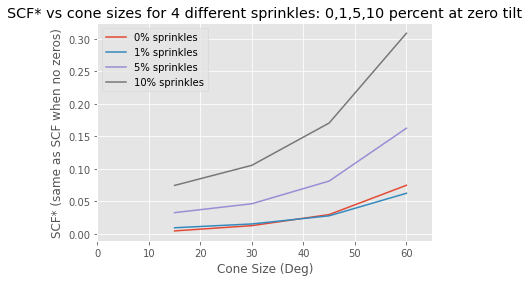

In [23]:
plt.title('SCF* vs cone sizes for 4 different sprinkles: 0,1,5,10 percent at zero tilt')
plt.plot(ConeVec,OnePeakSCFStarvsConeEpsilonTilt[:,0,0])
plt.plot(ConeVec,OnePeakSCFStarvsConeEpsilonTilt[:,1,0])
plt.plot(ConeVec,OnePeakSCFStarvsConeEpsilonTilt[:,2,0])
plt.plot(ConeVec,OnePeakSCFStarvsConeEpsilonTilt[:,3,0])
plt.legend
plt.xlim(0,65)
plt.xlabel('Cone Size (Deg)')
plt.ylabel('SCF* (same as SCF when no zeros)')
plt.legend(['0% sprinkles','1% sprinkles','5% sprinkles','10% sprinkles',])

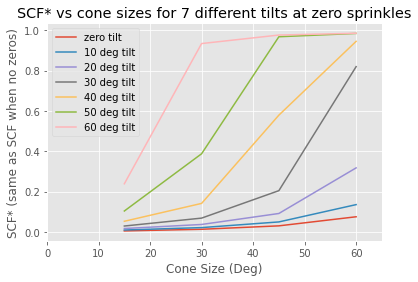

In [7]:
plt.title('SCF* vs cone sizes for 7 different tilts at zero sprinkles')
plt.plot(15+np.arange(4)*15,OnePeakSCFStarvsConeEpsilonTilt[:,0,0])
plt.plot(15+np.arange(4)*15,OnePeakSCFStarvsConeEpsilonTilt[:,0,1])
plt.plot(15+np.arange(4)*15,OnePeakSCFStarvsConeEpsilonTilt[:,0,2])
plt.plot(15+np.arange(4)*15,OnePeakSCFStarvsConeEpsilonTilt[:,0,3])
plt.plot(15+np.arange(4)*15,OnePeakSCFStarvsConeEpsilonTilt[:,0,4])
plt.plot(15+np.arange(4)*15,OnePeakSCFStarvsConeEpsilonTilt[:,0,5])
plt.plot(15+np.arange(4)*15,OnePeakSCFStarvsConeEpsilonTilt[:,0,6])
plt.xlim(0,65)
plt.xlabel('Cone Size (Deg)')
plt.ylabel('SCF* (same as SCF when no zeros)')
plt.legend(['zero tilt','10 deg tilt','20 deg tilt','30 deg tilt','40 deg tilt','50 deg tilt','60 deg tilt'])

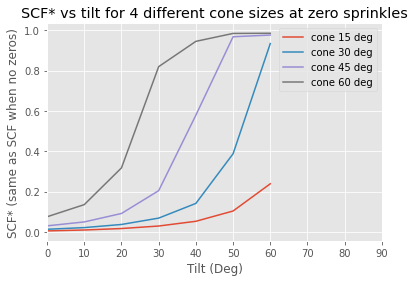

In [24]:
plt.title('SCF* vs tilt for 4 different cone sizes at zero sprinkles')
plt.plot(TiltVec,OnePeakSCFStarvsConeEpsilonTilt[0,0,:])
plt.plot(np.arange(7)*10,OnePeakSCFStarvsConeEpsilonTilt[1,0,:])
plt.plot(np.arange(7)*10,OnePeakSCFStarvsConeEpsilonTilt[2,0,:])
plt.plot(np.arange(7)*10,OnePeakSCFStarvsConeEpsilonTilt[3,0,:])
plt.xlim(0,90)
plt.xlabel('Tilt (Deg)')
plt.ylabel('SCF* (same as SCF when no zeros)')

plt.legend(['cone 15 deg','cone 30 deg','cone 45 deg','cone 60 deg'])

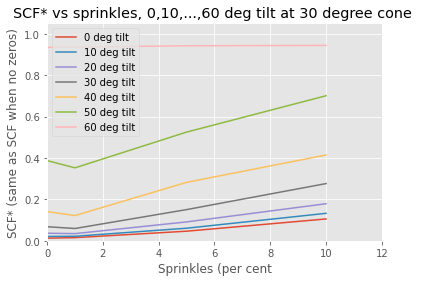

In [9]:
plt.title('SCF* vs sprinkles, 0,10,...,60 deg tilt at 30 degree cone ')

plt.plot(SprinkleVec,OnePeakSCFStarvsConeEpsilonTilt[1,:,0])
plt.plot(SprinkleVec,OnePeakSCFStarvsConeEpsilonTilt[1,:,1])
plt.plot(SprinkleVec,OnePeakSCFStarvsConeEpsilonTilt[1,:,2])
plt.plot(SprinkleVec,OnePeakSCFStarvsConeEpsilonTilt[1,:,3])
plt.plot(SprinkleVec,OnePeakSCFStarvsConeEpsilonTilt[1,:,4])
plt.plot(SprinkleVec,OnePeakSCFStarvsConeEpsilonTilt[1,:,5])
plt.plot(SprinkleVec,OnePeakSCFStarvsConeEpsilonTilt[1,:,6])
plt.legend
plt.xlim(0,12)
plt.ylim(0,1.05)
plt.xlabel('Sprinkles (per cent')
plt.ylabel('SCF* (same as SCF when no zeros)')
plt.legend(['0 deg tilt','10 deg tilt','20 deg tilt','30 deg tilt','40 deg tilt','50 deg tilt','60 deg tilt'])

In [10]:
OnePeakSCFStarvsConeEpsilonTilt[1,:,6]

array([0.93409924, 0.93533682, 0.94175085, 0.9435991 ])

In [11]:
OnePeakSCFStarvsConeEpsilonTilt[1,:,5]

array([0.38733592, 0.35228519, 0.52497811, 0.70055079])

In [37]:
Eps0 =OnePeakSCFStarvsConeEpsilonTilt[:,0,:] ; Eps0Flat = Eps0.flatten()
Eps1 =OnePeakSCFStarvsConeEpsilonTilt[:,1,:] ; Eps1Flat = Eps1.flatten()
Eps5 =OnePeakSCFStarvsConeEpsilonTilt[:,2,:] ; Eps5Flat = Eps5.flatten()
Eps10 =OnePeakSCFStarvsConeEpsilonTilt[:,3,:] ; Eps10Flat = Eps10.flatten()

In [28]:
ConeTiltArray = np.add.outer(ConeVec, TiltVec)
ConeTiltArrayFlat = ConeTiltArray.flatten()

Text(0.5, 0, 'Cone+Tilt in Degrees')

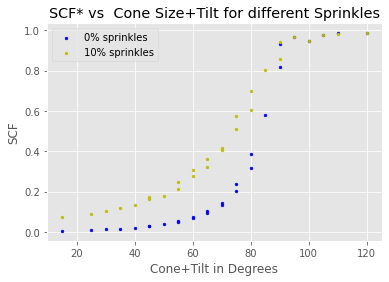

In [42]:
plt.scatter(ConeTiltArrayFlat,Eps0Flat,color='b',s=8)
#plt.scatter(ConeTiltArrayFlat,Eps1Flat,color='r',s=8)
#plt.scatter(ConeTiltArrayFlat,Eps5Flat,color='k',s=8)
plt.scatter(ConeTiltArrayFlat,Eps10Flat,color='y',s=8)
plt.legend(['0% sprinkles','10% sprinkles'])
plt.title('SCF* vs  Cone Size+Tilt for different Sprinkles')
plt.ylabel('SCF')
plt.xlabel('Cone+Tilt in Degrees')